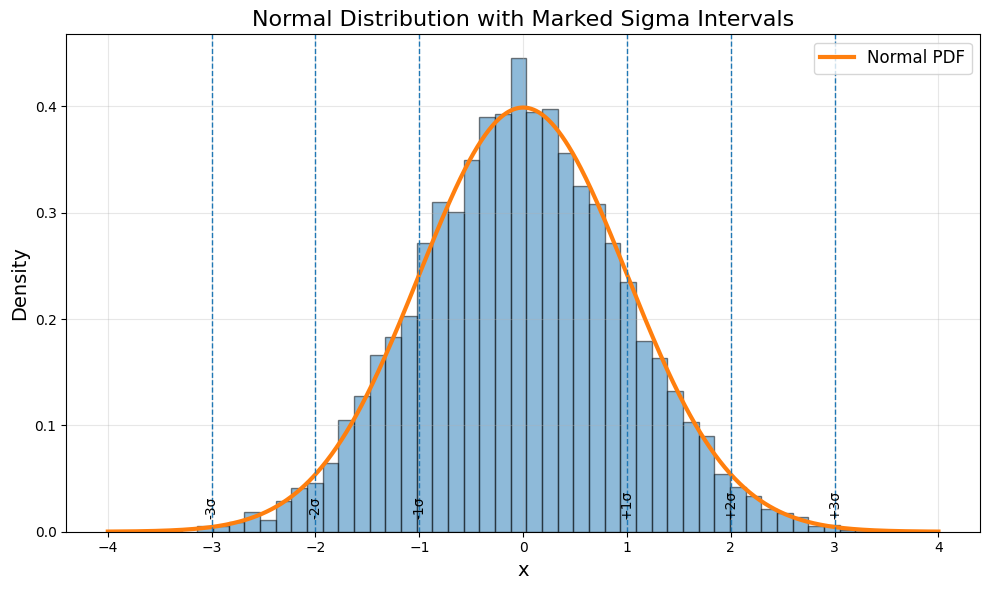

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(0)
n = 10000
mu, sigma = 0, 1

data = np.random.normal(mu, sigma, n)

plt.figure(figsize=(10, 6))

plt.hist(
    data,
    bins=50,
    density=True,
    alpha=0.5,
    edgecolor='black'
)

x = np.linspace(-4, 4, 1000)
plt.plot(
    x,
    norm.pdf(x, mu, sigma),
    linewidth=3,
    label='Normal PDF'
)

for i in range(1, 4):
    plt.axvline(mu + i*sigma, linestyle='--', linewidth=1)
    plt.axvline(mu - i*sigma, linestyle='--', linewidth=1)

    plt.text(mu + i*sigma, 0.015, f'+{i}σ', rotation=90,
             ha='center', fontsize=10)
    plt.text(mu - i*sigma, 0.015, f'-{i}σ', rotation=90,
             ha='center', fontsize=10)

plt.title('Normal Distribution with Marked Sigma Intervals', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [9]:
import numpy as np

np.random.seed(0)
p_geo = 0.1
n_samples = 10_000

geo = np.random.geometric(p_geo, n_samples)

top20_share = lambda x: np.sum(np.sort(x)[-int(0.2 * len(x)):]) / np.sum(x)

share_geo = top20_share(geo)
print(f"Ex.2 — Geometric(p={p_geo}): Top 20% share ≈ {share_geo:.3f}")



Ex.2 — Geometric(p=0.1): Top 20% share ≈ 0.507


In this case (geometric) it doesn't follow it since it is a light-tailed distribution

# Inverse Transform Sampling — Short Explanation

To generate random variables from a continuous power-law distribution

$$
f(x)=\frac{\alpha-1}{x_{\min}}
\left(\frac{x}{x_{\min}}\right)^{-\alpha}, \qquad x \ge x_{\min},
$$

we use **inverse transform sampling**.

---

## 1. Compute the CDF

$$
F(x)=P(X \le x)
= 1 - \left( \frac{x_{\min}}{x} \right)^{\alpha - 1}.
$$

---

## 2. Substitute a random variable \(U \sim \text{Uniform}(0,1)\)

Inverse transform sampling states:

> If \(U \sim (0,1)\), then
> \(X = F^{-1}(U)\) has distribution \(F\).

So we set:

$$
U = F(x)
= 1 - \left( \frac{x_{\min}}{x} \right)^{\alpha - 1}.
$$

---

## 3. Solve the equation for \(x\)

$$
1 - U = \left( \frac{x_{\min}}{x} \right)^{\alpha - 1}
$$

$$
x = x_{\min} (1-U)^{-1/(\alpha - 1)}.
$$

---

## 4. Final sampling formula

$$
X = x_{\min}\,(1-U)^{-\frac{1}{\alpha - 1}}.
$$

This corresponds to the Python code:

```python
samples = x_min * (1 - U)**(-1/(alpha - 1))


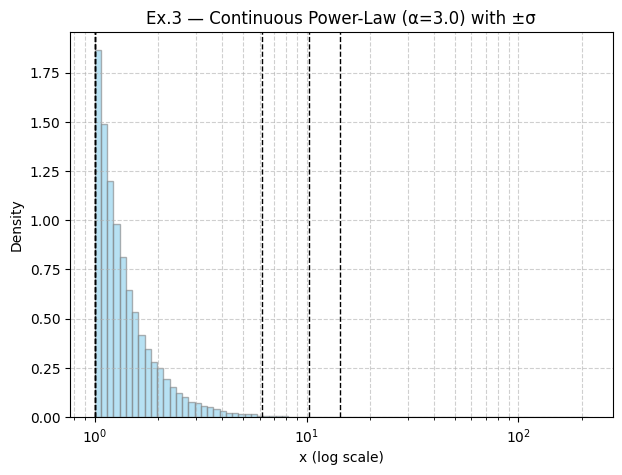

In [5]:
np.random.seed(0)

n_samples = 10_000
alpha = 3.0
x_min = 1.0

U = np.random.rand(n_samples)
samples = x_min * (1 - U) ** (-1 / (alpha - 1))

mu, sigma = np.mean(samples), np.std(samples)

bins = np.logspace(np.log10(x_min), np.log10(samples.max()), 80)
plt.figure(figsize=(7,5))
plt.hist(samples, bins=bins, density=True, alpha=0.6, color='skyblue', edgecolor='gray')

for k in [1, 2, 3]:
    plt.axvline(max(x_min, mu - k*sigma), color='k', linestyle='--', linewidth=1)
    plt.axvline(mu + k*sigma, color='k', linestyle='--', linewidth=1)

plt.xscale('log')
plt.title(f"Ex.3 — Continuous Power-Law (α={alpha}) with ±σ")
plt.xlabel("x (log scale)")
plt.ylabel("Density")
plt.grid(True, which='both', ls='--', alpha=0.6)
plt.show()

In [6]:
import numpy as np

np.random.seed(0)
n_samples = 10_000
s_zipf = 2.0

zipf_samples = np.random.zipf(s_zipf, n_samples)
sorted_vals = np.sort(zipf_samples)[::-1]

top_20 = int(0.2 * len(sorted_vals))
top_share = sorted_vals[:top_20].sum() / sorted_vals.sum()

print(f"Ex.4 — Zipf(s={s_zipf}): Top 20% share ≈ {top_share:.3f}")



Ex.4 — Zipf(s=2.0): Top 20% share ≈ 0.902


Parameters: n=5000, BA m=3 (avg~6), ER p≈0.00120 (avg~6.00)
BA: mean degree = 5.996, sample variance = 74.227, min=3, max=261
ER: mean degree = 5.895, sample variance = 5.715, min=0, max=17

Top hubs (BA):
  node 4: degree 261
  node 6: degree 204
  node 7: degree 179
  node 5: degree 164
  node 12: degree 108
  node 0: degree 107
  node 3: degree 105
  node 8: degree 94
  node 22: degree 91
  node 56: degree 89

Top hubs (ER):
  node 1796: degree 17
  node 4812: degree 16
  node 71: degree 15
  node 621: degree 15
  node 688: degree 15
  node 1580: degree 15
  node 2673: degree 15
  node 3135: degree 15
  node 3374: degree 15
  node 4571: degree 15


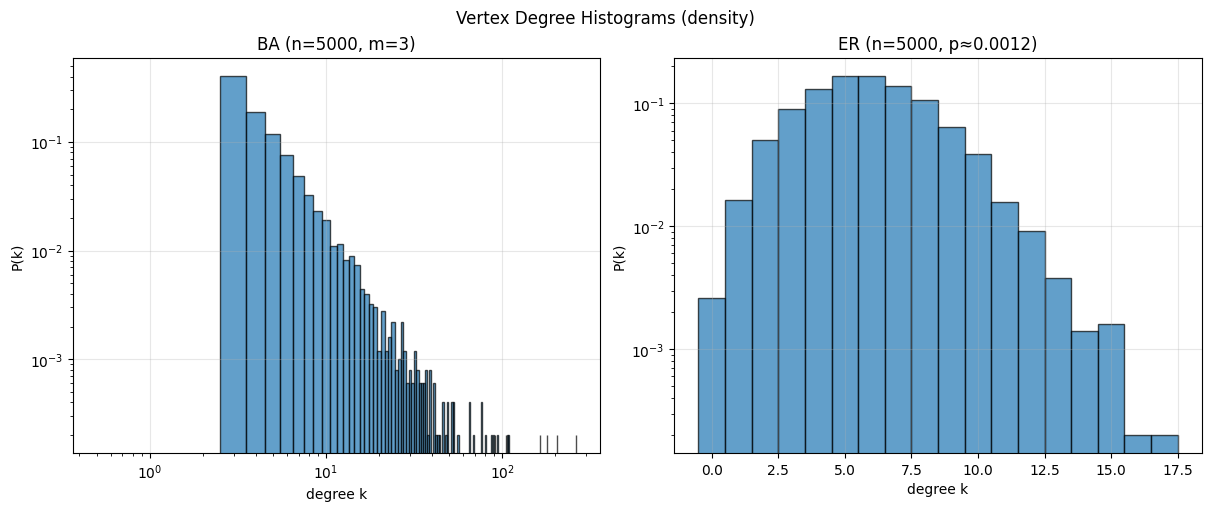

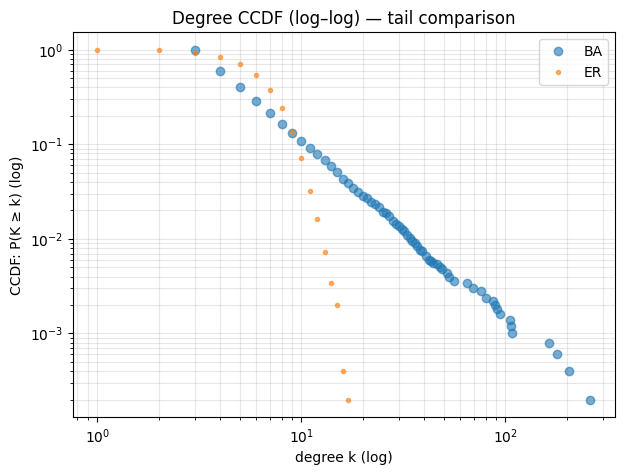


--- Comparison ---
• BA: heavy-tailed degree distribution with clear hubs (few nodes with very large degree).
• ER: degree distribution concentrated around the mean (~Poisson for large n, small p), far fewer/lower hubs.
• Means are similar by construction (~6), but variance is typically MUCH larger for BA (observed: BA var=74.23 vs ER var=5.72).
• The CCDF log–log plot shows an approximately linear tail for BA (power-law-like), while ER drops off much faster (exponential tail).


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

SEED = 42
rng = np.random.default_rng(SEED)

n = 5000
m = 3
target_k = 2*m
p = target_k / (n - 1)

print(f"Parameters: n={n}, BA m={m} (avg~{2*m}), ER p≈{p:.5f} (avg~{p*(n-1):.2f})")

G_ba = nx.barabasi_albert_graph(n=n, m=m, seed=SEED)
G_er = nx.erdos_renyi_graph(n=n, p=p, seed=SEED, directed=False)

deg_ba = np.fromiter((d for _, d in G_ba.degree()), dtype=int)
deg_er = np.fromiter((d for _, d in G_er.degree()), dtype=int)

def stats(name, deg):
    mean = np.mean(deg)
    var_sample = np.var(deg, ddof=1)
    print(f"{name}: mean degree = {mean:.3f}, sample variance = {var_sample:.3f}, "
          f"min={deg.min()}, max={deg.max()}")
    return mean, var_sample

mean_ba, var_ba = stats("BA", deg_ba)
mean_er, var_er = stats("ER", deg_er)

def top_hubs(G, k=10):
    return sorted(G.degree(), key=lambda x: x[1], reverse=True)[:k]

top_ba = top_hubs(G_ba, 10)
top_er = top_hubs(G_er, 10)

print("\nTop hubs (BA):")
for v, d in top_ba:
    print(f"  node {v}: degree {d}")

print("\nTop hubs (ER):")
for v, d in top_er:
    print(f"  node {v}: degree {d}")

def integer_hist(ax, degrees, title, logx=False, logy=False):
    max_deg = degrees.max()
    bins = np.arange(0, max_deg + 2) - 0.5
    ax.hist(degrees, bins=bins, density=True, edgecolor='black', alpha=0.7)
    ax.set_xlabel("degree k")
    ax.set_ylabel("P(k)")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    if logx: ax.set_xscale('log')
    if logy: ax.set_yscale('log')

fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
integer_hist(axes[0], deg_ba, f"BA (n={n}, m={m})", logx=True, logy=True)
integer_hist(axes[1], deg_er, f"ER (n={n}, p≈{p:.3g})", logx=False, logy=True)
plt.suptitle("Vertex Degree Histograms (density)")
plt.show()


def ccdf(data):
    vals, counts = np.unique(data, return_counts=True)
    pmf = counts / counts.sum()
    ccdf_vals = 1 - np.cumsum(pmf) + pmf
    return vals, ccdf_vals

k_ba, Fbar_ba = ccdf(deg_ba)
k_er, Fbar_er = ccdf(deg_er)

plt.figure(figsize=(7,5))
plt.plot(k_ba, Fbar_ba, marker='o', linestyle='', alpha=0.6, label='BA')
plt.plot(k_er, Fbar_er, marker='.', linestyle='', alpha=0.6, label='ER')
plt.yscale('log')
plt.xscale('log')
plt.grid(True, which='both', alpha=0.3)
plt.xlabel("degree k (log)")
plt.ylabel("CCDF: P(K ≥ k) (log)")
plt.title("Degree CCDF (log–log) — tail comparison")
plt.legend()
plt.show()

print("\n--- Comparison ---")
print("• BA: heavy-tailed degree distribution with clear hubs (few nodes with very large degree).")
print("• ER: degree distribution concentrated around the mean (~Poisson for large n, small p), far fewer/lower hubs.")
print(f"• Means are similar by construction (~{target_k}), but variance is typically MUCH larger for BA "
      f"(observed: BA var={var_ba:.2f} vs ER var={var_er:.2f}).")
print("• The CCDF log–log plot shows an approximately linear tail for BA (power-law-like), "
      "while ER drops off much faster (exponential tail).")


Number of nodes: 34
Number of edges: 78


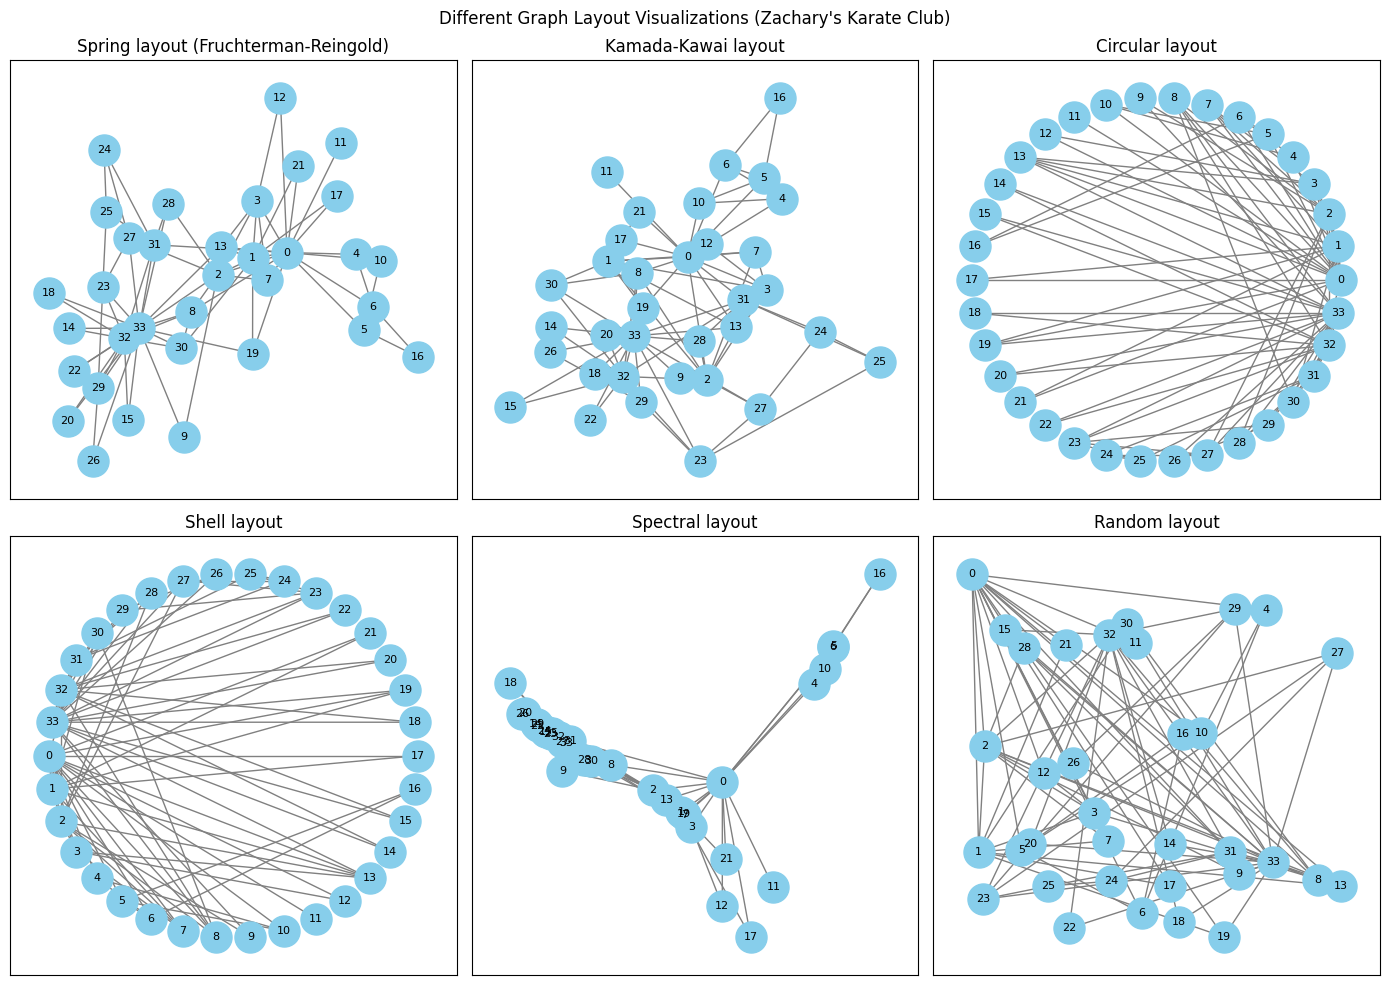

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

layouts = {
    "Spring layout (Fruchterman-Reingold)": nx.spring_layout,     # force-directed
    "Kamada-Kawai layout": nx.kamada_kawai_layout,                # another force-directed
    "Circular layout": nx.circular_layout,                        # nodes on a circle
    "Shell layout": nx.shell_layout,                              # concentric circles
    "Spectral layout": nx.spectral_layout,                        # based on eigenvectors
    "Random layout": nx.random_layout                             # random positions
}

plt.figure(figsize=(14, 10))
for i, (name, layout_func) in enumerate(layouts.items(), 1):
    plt.subplot(2, 3, i)
    pos = layout_func(G)
    nx.draw_networkx(
        G, pos,
        node_color="skyblue",
        edge_color="gray",
        with_labels=True,
        node_size=500,
        font_size=8
    )
    plt.title(name)

plt.suptitle("Different Graph Layout Visualizations (Zachary's Karate Club)")
plt.tight_layout()
plt.show()


## Force-Directed Layout with Simulated Annealing

This project implements a custom force-directed layout algorithm for a Barabási–Albert (BA) network using **simulated annealing**. Instead of relying on built-in layout methods, the layout is computed by minimizing a physically inspired energy function.

---

### Model Overview

Each graph node is treated as a point in 2D space. The layout is governed by two types of forces:

#### **1. Spring attraction along edges**
Every edge is modeled as a spring with preferred length \( L_0 \):

$$
E_{\text{spring}} = \frac{1}{2} k_{\text{spring}} (d - L_0)^2
$$

where \( d \) is the current edge length.

#### **2. Repulsion between all node pairs**
All nodes repel each other with a Coulomb-like term:

$$
E_{\text{repulsion}} = \sum_{i < j} \frac{k_{\text{rep}}}{\text{dist}(i,j)}
$$

---

### Total Energy

The total energy of a configuration is:

$$
E = E_{\text{spring}} + E_{\text{repulsion}}
$$

A visually good layout corresponds to a configuration with **low total energy**.

---

### Optimization via Simulated Annealing

To minimize the energy, I use simulated annealing:

1. Initialize node positions randomly in \([-1,1] \times [-1,1]\).
2. Repeatedly pick a random node and propose a small random displacement.
3. Compute the **local energy change** \( \Delta E \) for that node only
   (incident springs + repulsion with all other nodes).
4. Accept the move if:
   - \( \Delta E \le 0 \)
   - or with probability
     $$ \exp\left(-\frac{\Delta E}{T}\right) $$
     when \( \Delta E > 0 \) (Metropolis criterion).
5. Gradually cool the system:
   $$ T_{\text{new}} = \alpha T $$
   where \( \alpha < 1 \) is the cooling factor.
6. Stop when the temperature is low and almost no moves are accepted.

---

### Animation

During optimization, intermediate layouts are recorded and used to create a GIF:



Final energy: 140.175, frames stored: 792


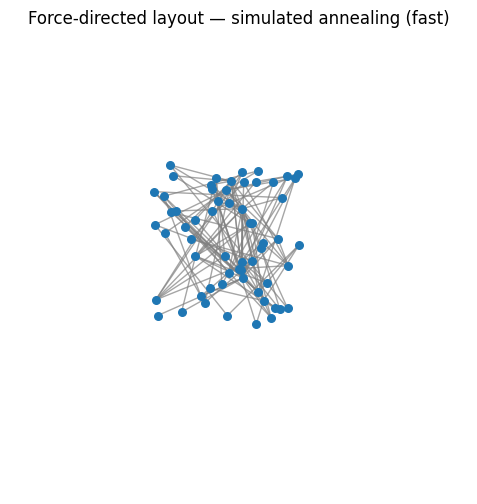

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection

SEED = 0
rng = np.random.default_rng(SEED)

G = nx.barabasi_albert_graph(n=60, m=2, seed=SEED)
N = G.number_of_nodes()
nodes = np.array(G.nodes())

# Spring–electrical model parameters
k_spring = 1.0   # spring strength (attractive force along edges)
L0 = 0.5         # preferred edge length
k_rep = 0.1      # repulsive constant between all node pairs
eps = 1e-6

# Simulated annealing parameters
T0 = 1.0         # initial temperature
T_min = 1e-3     # stop when T < T_min
cooling = 0.90   # multiplicative cooling factor per outer loop
steps_per_T = 5 * N   # inner Metropolis steps per temperature level
proposal_scale = 0.1  # initial scale of random node displacement
early_stop_ratio = 0.02   # if accept ratio too low, terminate early

record_every = 25   # record layout after this many Metropolis steps

# Initial node positions: random in a square [-1, 1] x [-1, 1]
pos = rng.uniform(-1, 1, size=(N, 2))

node_to_idx = {v: i for i, v in enumerate(nodes)}

edges_idx = np.array(
    [(node_to_idx[u], node_to_idx[v]) for u, v in G.edges()],
    dtype=int
)


def energy_total(p: np.ndarray) -> float:
    """
    Total energy of the layout:
    E = E_spring (edges as springs) + E_rep (global repulsion).
    p: array of shape (N, 2) with node coordinates.
    """
    # Vector of edge vectors: difference between endpoints
    edge_vectors = p[edges_idx[:, 0]] - p[edges_idx[:, 1]]
    edge_lengths = np.sqrt((edge_vectors ** 2).sum(axis=1) + eps)
    E_spring = 0.5 * k_spring * ((edge_lengths - L0) ** 2).sum()

    # Repulsive energy (between all unordered pairs of nodes)
    E_rep = 0.0
    for i in range(N - 1):
        diff = p[i] - p[i + 1:]
        dist = np.sqrt((diff ** 2).sum(axis=1) + eps)
        E_rep += (k_rep / dist).sum()

    return E_spring + E_rep


def energy_node_contrib(p: np.ndarray, i: int) -> float:
    """
    Energy contribution associated with node i:
    - spring energy on edges incident to i,
    - repulsive energy between i and all other nodes.
    Used to compute local energy change when moving a single node.
    """
    # Spring energy for edges incident to node i
    mask_i = (edges_idx[:, 0] == i) | (edges_idx[:, 1] == i)
    incident_edges = edges_idx[mask_i]

    if incident_edges.size:
        other = np.where(incident_edges[:, 0] == i,
                         incident_edges[:, 1],
                         incident_edges[:, 0])
        edge_vectors = p[i] - p[other]
        edge_lengths = np.sqrt((edge_vectors ** 2).sum(axis=1) + eps)
        E_spring = 0.5 * k_spring * ((edge_lengths - L0) ** 2).sum()
    else:
        E_spring = 0.0

    # Repulsive energy for node i with all others
    others_mask = np.arange(N) != i
    diff = p[i] - p[others_mask]
    dist = np.sqrt((diff ** 2).sum(axis=1) + eps)
    E_rep = (k_rep / dist).sum()

    return E_spring + E_rep

# SIMULATED ANNEALING

frames = []             # recorded layouts for animation
E = energy_total(pos)   # current total energy
T = T0                  # current temperature
iters = 0               # global Metropolis step counter

while T > T_min:
    accepts = 0

    for _ in range(steps_per_T):
        # 1) Pick a random node to move
        i = rng.integers(0, N)

        # 2) Store old position & local energy
        old_pos_i = pos[i].copy()
        E_old_local = energy_node_contrib(pos, i)

        # 3) Propose a random move for this node
        proposal = rng.normal(scale=proposal_scale, size=2)
        pos[i] = pos[i] + proposal

        # 4) Compute new local energy and ΔE
        E_new_local = energy_node_contrib(pos, i)
        dE = E_new_local - E_old_local

        # 5) Metropolis acceptance rule
        if (dE <= 0) or (rng.random() < np.exp(-dE / max(T, 1e-12))):
            # accept: update total energy
            E += dE
            accepts += 1
        else:
            # reject: revert position
            pos[i] = old_pos_i

        # 6) Occasionally record current layout
        iters += 1
        if iters % record_every == 0:
            frames.append(pos.copy())

    # Acceptance ratio at this temperature level
    accept_ratio = accepts / steps_per_T
    if accept_ratio < early_stop_ratio:
        # If almost nothing is accepted, system is "frozen" → stop early
        break

    # Cooling schedule (lower temperature & smaller move proposals)
    T *= cooling
    proposal_scale *= 0.98

print(f"Final energy: {E:.3f}, frames stored: {len(frames)}")


fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.set_title("Force-directed layout — simulated annealing")
ax.axis('off')

def build_segments(p: np.ndarray) -> np.ndarray:
    """
    Build an array of line segments [[x1,y1],[x2,y2]] for each edge,
    given positions p of shape (N, 2).
    """
    return np.stack([p[edges_idx[:, 0]], p[edges_idx[:, 1]]], axis=1)

# Initial segments and scatter
segments = build_segments(frames[0])
lc = LineCollection(segments, colors='gray', linewidths=1.0, alpha=0.7)
sc = ax.scatter(frames[0][:, 0], frames[0][:, 1], s=30, zorder=3)
ax.add_collection(lc)

# Set axis limits based on all recorded positions
all_points = np.concatenate(frames, axis=0)
pad = 0.1 * (all_points.max() - all_points.min() + 1e-12)
ax.set_xlim(all_points[:, 0].min() - pad, all_points[:, 0].max() + pad)
ax.set_ylim(all_points[:, 1].min() - pad, all_points[:, 1].max() + pad)

# We don't need all frames – subsample to at most ~300 frames for smooth animation
stride = max(1, len(frames) // 300)
frame_indices = list(range(0, len(frames), stride))

def update(frame_idx: int):
    p = frames[frame_idx]
    sc.set_offsets(p)
    lc.set_segments(build_segments(p))
    return sc, lc

ani = FuncAnimation(
    fig,
    update,
    frames=frame_indices,
    interval=40,   # ms between frames
    blit=True
)

plt.show()

ani.save("spring_annealing_fast.gif", dpi=100, fps=12, writer="pillow")


In [ ]:
g = ExampleData[{"NetworkGraph", "ZacharyKarateClub"}];

Print["Number of nodes: ", VertexCount[g]];
Print["Number of edges: ", EdgeCount[g]];

layouts = <|
  "Spring layout (Fruchterman\[Dash]Reingold)" -> "SpringElectricalEmbedding",
  "Kamada\[Dash]Kawai layout"                  -> "KamadaKawaiEmbedding",
  "Circular layout"                      -> "CircularEmbedding",
  "Shell layout"                         -> "ShellEmbedding",
  "Spectral layout"                      -> "SpectralEmbedding",
  "Random layout"                        -> "RandomEmbedding"
|>;

panel = Labeled[
    Graph[g,
      GraphLayout -> #2,
      VertexLabels -> "Name",
      VertexStyle -> LightBlue,
      EdgeStyle -> Gray,
      ImageSize -> 300
    ],
    #1, Top
  ] &;

Grid[
  Partition[KeyValueMap[panel, layouts], 3],
  Spacings -> {2, 2}
]